#Mitigating Bias in Machine Learning: SMOTE

STUDENT NAME(S): Lance Santana, Cole Hammes

# Instructions

The goal of this mini-assignment is to give you a chance to get more familiar with fairness metrics and to detect bias in datasets or ML algorithms and apply simple approaches to mitigitate this bias.

You can work on this mini-assignment in pairs. You will turn in a complete notebook to Gradescope by the deadline. Be sure that you are utilizing dicussion time to work on the assignment and be sure to 'demo' what you have completed by the end of your discussion session. You can continue to work on the mini-assignment and turn it by the due date.


# Biases and Machine Learning

An ML model makes predictions of an outcome for a particular instance. The model makes these preductions based on a training dataset where its attempting to find patterns in the datast to predict a label for a new unseen instance.

For example, lets suppose we are working with a loan application dataset. The dataset has a target binary variable (1 - applicant is likely to repay the loan and 0 - applicant is likely not to repay the loan). The ML model will use the provided features to determine patterns that are closely related to this target variable. However, sometimes the patterns that are found may not be desirable or may even be illegal. For example, a loan repay model may determine that age plays a significat role in the prediction of repayment because the training happends to have better repayment for one age group than for another.

This raises two problems: 1 - the training dataset may not be representative of the true population of people of all age groups, 2 - even if it is representative, it is illegal to base any decision on an applicant's age.

# Task

1. Step 1 - Import the dataset and split into training and test (80/20). In this dataset, we will focus on evaluating fairness with respect to age. Assume that 'age >= 25' is considered 'privileged' and 'age < 25' is considered 'unpriviledged'.  You can also drop the feature 'Personal status and sex' because its a protected attribute too.

2. Step 2 - Next, train an ML model (lets say DecisionTree) on the original dataset and compute fairness metric and highlight the results for the privileged and unpriviledged groups. Include results, graphs and a discussion.

3. Step 3 - We will now try to mitigate bias by transforming the original dataset. The previous step likley showed that the privileged group was getting more positive outcomes in the training dataset. Since this is not desirable, we are going to try to mitigate this bias in the training dataset so that our model is not susceptible to this bias. This is called pre-processing mitigation and one approach we can take is to reweight the items in the dataset by oversampling or undersampling. Take a look at SMOTE (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

4. Step 4 - Compute fairness metric on transformed dataset.  Now that we have transformed the dataset, we can check how effective it was in removing bias by using the same metric we computed in step 2.


In [ ]:
!pip install ucimlrepo
!pip install imbalanced-learn

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


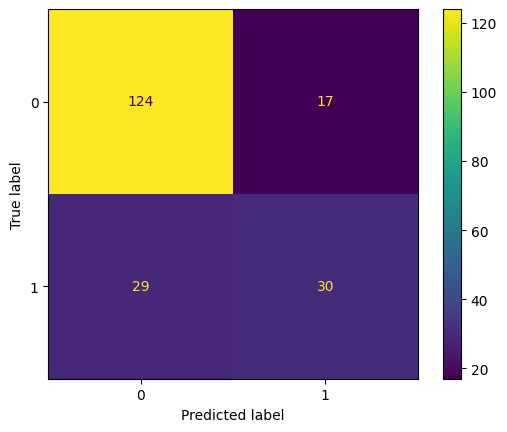

Matrix over 25


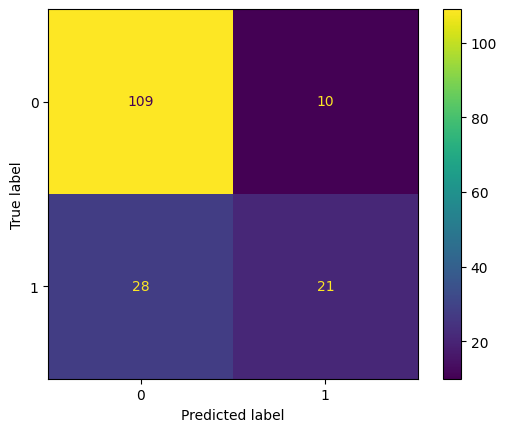

matrix under 25


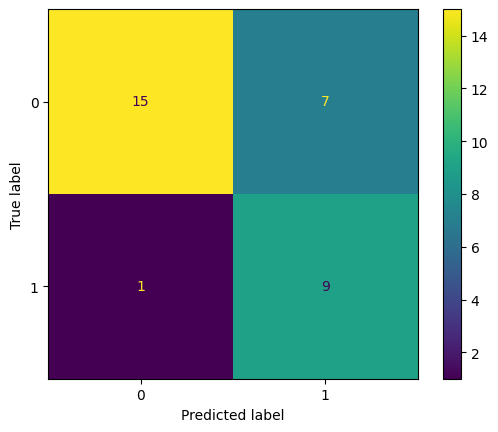

Privileged Accuracy: 0.77
Unprivileged Accuracy: 0.75


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


#Drop protected attribute Personal status and sex
try:
  X = X.drop(columns=["Attribute9"])
except KeyError:
  print("Already Deleted")

#Convert categorical attributes
categorical_col = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns = categorical_col, drop_first = True)
X["Is Privileged"] = (X["Attribute13"] >= 25).astype(int)


# Step 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

# Step 2
# Train a classifier (replace DecisionTreeClassifier with your desired classifier)
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix for all the data
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Show the confusion matrix for privilaged and unprivilaged groups
privileged_test = X_test[X_test["Is Privileged"] == 1]
unprivileged_test = X_test[X_test["Is Privileged"] == 0]

privileged_y_test = y_test.iloc[privileged_test.index]
unprivileged_y_test = y_test.iloc[unprivileged_test.index]
privileged_y_pred = clf.predict(privileged_test)
unprivileged_y_pred = clf.predict(unprivileged_test)
privileged_cm = confusion_matrix(privileged_y_test, privileged_y_pred)
unprivileged_cm = confusion_matrix(unprivileged_y_test, unprivileged_y_pred)

print("Matrix over 25")
disp_priv = ConfusionMatrixDisplay(privileged_cm)
disp_priv.plot()
plt.show()
print("matrix under 25")
disp_unpriv = ConfusionMatrixDisplay(unprivileged_cm)
disp_unpriv.plot()
plt.show()

# adding up the true positives and negatives to find the accuracy
privileged_accuracy = (privileged_cm[0, 0] + privileged_cm[1, 1]) / privileged_cm.sum()
unprivileged_accuracy = (unprivileged_cm[0, 0] + unprivileged_cm[1, 1]) / unprivileged_cm.sum()

print(f"Privileged Accuracy: {privileged_accuracy:.2f}")
print(f"Unprivileged Accuracy: {unprivileged_accuracy:.2f}")

The output shows that the accuracy for predicting privileged individuals is higher than the accuracy predicting unprivileged people. In situations like those with face recognition technology, it is important that these accuracies are closer so one population isn't being unfairly unrecognized and therefore disadvantaged.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_train_second, y_train_second = smote.fit_resample(X_train, y_train)

clf_smote = LogisticRegression(max_iter = 1000)
clf_smote.fit(X_train_second, y_train_second)

y_pred_smote = clf_smote.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
privileged_y_pred_SMOTE = clf_smote.predict(privileged_test)
unprivileged_y_pred_SMOTE = clf_smote.predict(unprivileged_test)

privileged_cm_SMOTE = confusion_matrix(privileged_y_test, privileged_y_pred_SMOTE)
unprivileged_cm_SMOTE = confusion_matrix(unprivileged_y_test, unprivileged_y_pred_SMOTE)

privileged_accuracy_SMOTE = (privileged_cm_SMOTE[0, 0] + privileged_cm_SMOTE[1, 1]) / privileged_cm_SMOTE.sum()
unprivileged_accuracy_SMOTE = (unprivileged_cm_SMOTE[0, 0] + unprivileged_cm_SMOTE[1, 1]) / unprivileged_cm_SMOTE.sum()

print(f"Privileged Accuracy with SMOTE: {privileged_accuracy_SMOTE:.2f}")
print(f"Unprivileged Accuracy with SMOTE: {unprivileged_accuracy_SMOTE:.2f}")

Privileged Accuracy with SMOTE: 0.77
Unprivileged Accuracy with SMOTE: 0.78


The results of the SMOTE have resulted in an increase in accuracy for unprivileged to .78. This means that SMOTE was successful in reducing the overall discrepancy between population identification accuracy.

# References / Disclosures

Used ChatGPT as a teaching and instructional tool.